<a href="https://colab.research.google.com/github/Renator12/DATA-SCIENCE-PROJECTS-TMU/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/static/public/488/facebook+live+sellers+in+thailand.zip #getting data using linux commands

--2024-03-27 01:39:50--  https://archive.ics.uci.edu/static/public/488/facebook+live+sellers+in+thailand.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘facebook+live+sellers+in+thailand.zip’

facebook+live+selle     [   <=>              ] 357.90K   518KB/s    in 0.7s    

2024-03-27 01:39:51 (518 KB/s) - ‘facebook+live+sellers+in+thailand.zip’ saved [366487]



In [2]:
!unzip   facebook+live+sellers+in+thailand.zip #unzipping file


Archive:  facebook+live+sellers+in+thailand.zip
 extracting: Live_20210128.csv       


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
df=pd.read_csv('Live_20210128.csv')#importing dataframe

In [5]:
df.drop(['Column1','Column2','Column3','Column4'],inplace=True,axis=1)#dropping empty or useless columnns

In [6]:
df.dropna(inplace=True) #dropping empty values
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
duplicate_rows = df.duplicated() #no duplicate rows in dataframe
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
7045    False
7046    False
7047    False
7048    False
7049    False
Length: 7050, dtype: bool

In [8]:
df.isna().sum() #no empty values in dataframe

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [9]:
numeric_columns =df.loc[:, 'num_reactions':'num_angrys'].columns #slicing the numeric columns for min-max scaling
numeric_columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [10]:
for column_name in numeric_columns:    #looping over the numeric columns and min-max scaling
     df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min()) #minmaxscaling

In [11]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,2,photo,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,3,video,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,4,photo,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,5,photo,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [12]:
df = pd.get_dummies(df, columns=['status_type']) #transforming categorical data into dummy variables
df.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,1,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0,0,0,1
1,2,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0,0
2,3,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0,0,0,1
3,4,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0,0
4,5,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0,1,0,0


In [13]:
finaldf=df.drop(['status_id','status_published'],axis=1) #dropping useless columns

In [14]:
finaldf.head() #our transformed dataframe which has normalized numeric columns,removed useless date and status_id columns and used pandas dummies to convert status_type categorical column

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0,0,0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0,0,0,1
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0,1,0,0


In [15]:
finaldf.describe()   #as we can see the numeric dataframes are scaled between 0 and 1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651,0.008936,0.608227,0.051773,0.331064
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


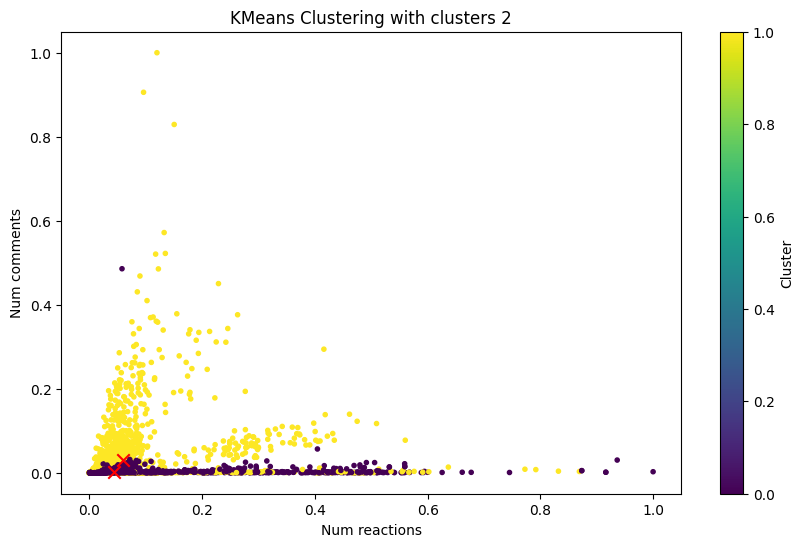

In [16]:
 inertia_array=[]   #initializing inertia array fixing kmeans to 3 clusters and plotting the normalized data on a scatter plot
 kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(finaldf)
 cluster_labels_2=kmeans_2.labels_
 cluster_centers_2 = kmeans_2.cluster_centers_
 inertia_array.append(kmeans_2.inertia_)
 plt.figure(figsize=(10, 6))

plt.scatter(finaldf.iloc[:, 0], finaldf.iloc[:, 1], c=cluster_labels_2, cmap='viridis', marker='.')
plt.scatter(cluster_centers_2[:, 0], cluster_centers_2[:, 1], c='red', marker='x', s=80)

plt.title('KMeans Clustering with clusters 2')
plt.xlabel('Num reactions')
plt.ylabel('Num comments')
plt.colorbar(label='Cluster')
plt.show()

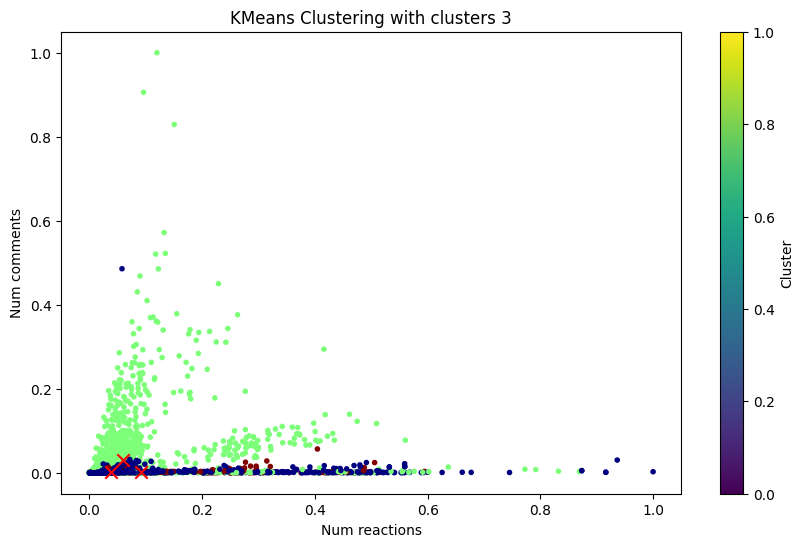

In [17]:
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(finaldf) #fixing kmeans to 3 clusters and plotting the normalized data on a scatter plot
cluster_centers_3 = kmeans_3.cluster_centers_
cluster_labels_3=kmeans_3.labels_
plt.figure(figsize=(10, 6))

plt.scatter(finaldf.iloc[:, 0], finaldf.iloc[:, 1], c=cluster_labels_3,cmap='jet', marker='.')
plt.scatter(cluster_centers_3[:, 0], cluster_centers_3[:, 1], c='red', marker='x', s=80)

plt.title('KMeans Clustering with clusters 3')
plt.xlabel('Num reactions')
plt.ylabel('Num comments')
plt.colorbar(label='Cluster')
plt.show()
inertia_array.append(kmeans_3.inertia_)

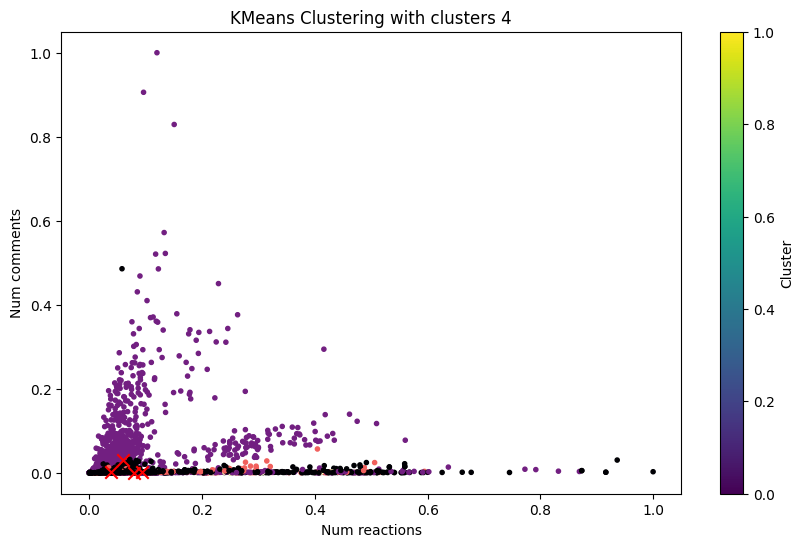

In [18]:
kmeans_4 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(finaldf)         #fixing kmeans to 4 clusters and plotting the normalized data on a scatter plot
cluster_centers_4 = kmeans_4.cluster_centers_
cluster_labels_4=kmeans_4.labels_
plt.figure(figsize=(10, 6))

plt.scatter(finaldf.iloc[:, 0], finaldf.iloc[:, 1], c=cluster_labels_4,cmap='magma', marker='.')
plt.scatter(cluster_centers_4[:, 0], cluster_centers_4[:, 1], c='red', marker='x', s=80)
plt.title('KMeans Clustering with clusters 4')
plt.xlabel('Num reactions')
plt.ylabel('Num comments')
plt.colorbar(label='Cluster')
plt.show()
inertia_array.append(kmeans_4.inertia_)

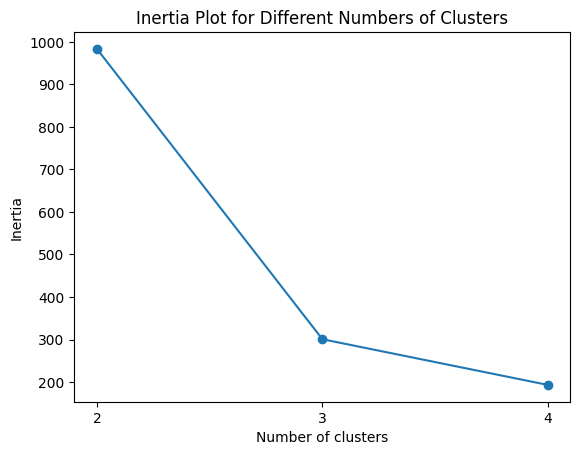

In [19]:

cluster_range = range(2, 5)           #plotting intertia elbow plot to see ideal number for n(cluster number)
plt.plot(cluster_range, inertia_array, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot for Different Numbers of Clusters')
plt.xticks(cluster_range)
plt.show()

In [20]:
#According to the elbow method,the number of clusters where inertia goes down the fastest is at n=3('the elbow').


In [21]:
#Since k means is an unsupervised method,we need a unique scoring metric for this system.We use the silhouette score here which is
#calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)
#When silhouette score=1: Means clusters are well apart from each other and clearly distinguished.

#When silhouette score=0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

#When silhouette score=-1: Means clusters are assigned in the wrong way.

In [24]:
silhouette_avg2 = silhouette_score(finaldf, kmeans_2.labels_) #using sklearns silhouette coefficient for cluster n=2
silhouette_avg2

0.8100521348183234

In [25]:
silhouette_avg3 = silhouette_score(finaldf, kmeans_3.labels_)#using sklearns silhouette coefficient for cluster n=2
silhouette_avg3

0.8972493682244883

In [26]:
silhouette_avg4 = silhouette_score(finaldf, kmeans_4.labels_)#using sklearns silhouette coefficient for cluster n=2
silhouette_avg4

0.9106664962327086

In [ ]:
#As we can see from our solutions,the silhouette_avg2 to silhouette_avg3 jumps up 10% and hence we choose the number of clusters as 3 .A 0.91% silhouette score shows a good clustering result and clusters are well distinguished